In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras import layers, Model
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
%%capture
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [ ]:
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

X_train_mlp = train_images.reshape(60000, 28*28)
X_test_mlp = test_images.reshape(10000, 28*28)

X_train_cnn = np.expand_dims(train_images, axis=-1)
X_test_cnn = np.expand_dims(test_images, axis=-1)

In [ ]:
X_train_cnn.shape

(60000, 28, 28, 1)

In [ ]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

In [ ]:
inp = layers.Input(shape=(784,))
x = layers.Dense(64, activation='relu')(inp)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_mlp = Model(inp, out)
model_mlp.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0     

In [ ]:
model_mlp.compile(optimizer=optimizers.Adam(learning_rate=0.005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history1 = model_mlp.fit(X_train_mlp, train_labels,
                         epochs=30, batch_size=128,
                         validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 19s 10ms/step - loss: 0.8620 - accuracy: 0.6736 - val_loss: 0.5174 - val_accuracy: 0.8154
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.6096 - accuracy: 0.7847 - val_loss: 0.4964 - val_accuracy: 0.8265
Epoch 3/30
375/375 [==============================] - 4s 10ms/step - loss: 0.5768 - accuracy: 0.7974 - val_loss: 0.4401 - val_accuracy: 0.8533
Epoch 4/30
375/375 [==============================] - 3s 7ms/step - loss: 0.5446 - accuracy: 0.8103 - val_loss: 0.4510 - val_accuracy: 0.8457
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5196 - accuracy: 0.8179 - val_loss: 0.4342 - val_accuracy: 0.8469
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.5107 - accuracy: 0.8195 - val_loss: 0.4101 - val_accuracy: 0.8533
Epoch 7/30
375/375 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.8223 - val_loss: 0.4218 - val_accuracy: 0.8440
Epo

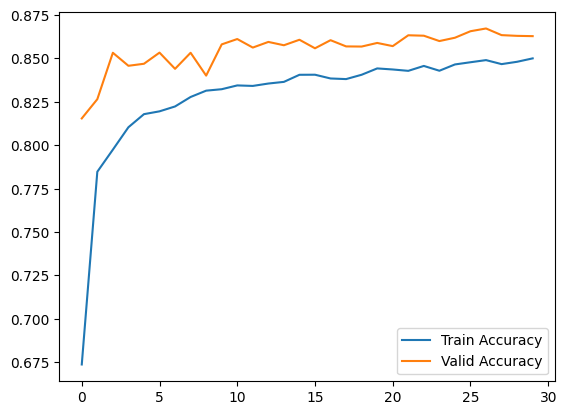

In [ ]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Valid Accuracy')
plt.legend()

In [ ]:
model_mlp.evaluate(X_test_mlp, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8555


[0.41860687732696533, 0.8554999828338623]

## CNN Model

In [ ]:
inp = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(64, 3, padding='same')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, 3, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inp, out)
model_cnn.summary()

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_76 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_76 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 14, 14, 128)       738

In [ ]:
reduce_lr = callbacks.ReduceLROnPlateau(patience=3, factor=0.7)
checkpoint = callbacks.ModelCheckpoint('model_v.h5')
cnn_callbacks=[reduce_lr, checkpoint]

In [ ]:
model_cnn.compile(optimizer=optimizers.Adam(learning_rate=0.005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history2 = model_cnn.fit(X_train_cnn, train_labels,
                         epochs=70, batch_size=128,
                         validation_split=0.2,
                         callbacks=cnn_callbacks)

Epoch 1/70
375/375 [==============================] - 6s 11ms/step - loss: 1.1560 - accuracy: 0.5506 - val_loss: 5.5155 - val_accuracy: 0.1027 - lr: 0.0050
Epoch 2/70
 13/375 [>.............................] - ETA: 3s - loss: 0.8006 - accuracy: 0.7097

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 4s 11ms/step - loss: 0.7932 - accuracy: 0.7007 - val_loss: 0.6439 - val_accuracy: 0.7567 - lr: 0.0050
Epoch 3/70
375/375 [==============================] - 4s 11ms/step - loss: 0.6997 - accuracy: 0.7394 - val_loss: 0.5581 - val_accuracy: 0.8018 - lr: 0.0050
Epoch 4/70
375/375 [==============================] - 4s 11ms/step - loss: 0.6543 - accuracy: 0.7598 - val_loss: 0.9933 - val_accuracy: 0.6371 - lr: 0.0050
Epoch 5/70
375/375 [==============================] - 4s 10ms/step - loss: 0.6127 - accuracy: 0.7760 - val_loss: 0.5655 - val_accuracy: 0.7897 - lr: 0.0050
Epoch 6/70
375/375 [==============================] - 4s 10ms/step - loss: 0.5867 - accuracy: 0.7885 - val_loss: 0.5325 - val_accuracy: 0.8173 - lr: 0.0050
Epoch 7/70
375/375 [==============================] - 4s 11ms/step - loss: 0.5656 - accuracy: 0.7982 - val_loss: 0.6168 - val_accuracy: 0.7864 - lr: 0.0050
Epoch 8/70
375/375 [==============================] - 4s 11ms/step - loss: 

In [ ]:
model_cnn.save('model_t.h5')

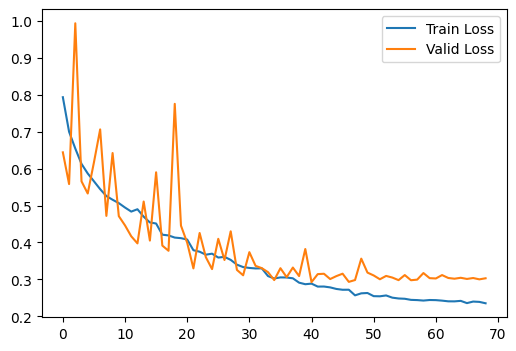

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history2.history['loss'][1:], label='Train Loss')
plt.plot(history2.history['val_loss'][1:], label='Valid Loss')
plt.legend()

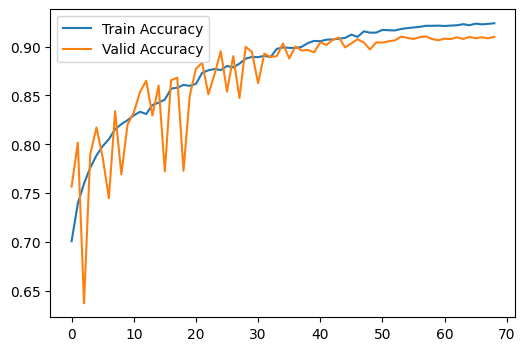

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history2.history['accuracy'][1:], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'][1:], label='Valid Accuracy')
plt.legend()

In [ ]:
model_cnn_best = load_model('model_v.h5')

In [ ]:
model_cnn_best.evaluate(X_test_cnn, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.9039


[0.32484155893325806, 0.9039000272750854]

In [ ]:
preds = model_cnn_best.predict(X_test_cnn)
preds_classes = preds.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, preds_classes, target_names=class_names.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.81      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.72      0.74      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



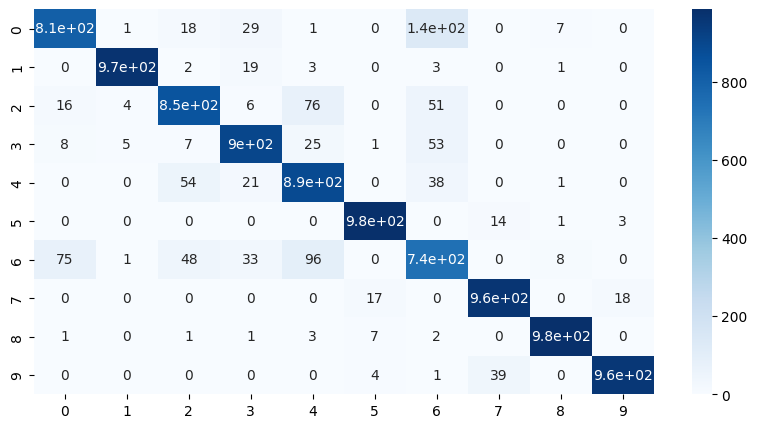

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,5))
matrix = confusion_matrix(test_labels, preds_classes)
ax = sns.heatmap(matrix, cmap="Blues", annot=True)